Global warming is a major concern because  it threatens the carbon fixation and respiration rates of tropical forest, which are very important to the terrestrial net primary production. The SlotWinter2017 dataset provides a  series of information of mesurements for multiple variables related to the photosyntetic metabolism of multiple especies of two tropical forest located in Panamá. The goal of the study is to check the impact of temperature on the photosyntetic response.

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import normaltest
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 '.RData',
 '.Rhistory',
 'counter',
 'notebook.nb.html',
 'notebook.Rmd',
 'nph.14469.pdf',
 'SlotWinter2017_NewPhyt.Data.xlsx',
 'Untitled.ipynb']

## Exploratory analysis 

In [3]:
data = pd.read_excel("SlotWinter2017_NewPhyt.Data.xlsx")
data

,Date,DOY,Site,Form,Species,Rep,Leaf,Time,Tleaf,Photo,Cond,Ci,Trmmol,VpdL,Tair,TBlk,CO2R,CiCa,CO2S
0,2016-04-29,119,FTS,Liana,Adelphia platyrachis,1,100,12.933,36.543,3.499,0.111,310.0,4.183,3.717,39.049,41.160,390.0,0.795,383.8
1,2016-04-29,119,FTS,Liana,Adelphia platyrachis,1,100,12.945,36.961,2.153,0.128,334.3,4.876,3.778,39.545,41.703,390.0,0.857,385.1
2,2016-04-29,119,FTS,Liana,Adelphia platyrachis,1,100,12.970,36.068,5.286,0.135,296.8,4.749,3.485,39.985,42.009,390.1,0.761,384.4
3,2016-04-29,119,FTS,Liana,Adelphia platyrachis,1,100,12.926,36.474,3.627,0.071,279.4,2.810,3.852,38.814,40.686,390.1,0.716,381.6
4,2016-04-29,119,FTS,Liana,Adelphia platyrachis,1,100,12.964,37.336,4.154,0.066,258.8,2.821,4.141,39.972,42.024,390.1,0.663,383.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3937,2016-02-24,55,PNM,Tree,Zuelania guidonia,1,100,7.060,24.640,15.420,0.330,292.0,2.760,0.920,25.390,24.030,399.4,0.731,380.0
3938,2016-02-24,55,PNM,Tree,Zuelania guidonia,1,100,7.354,25.230,14.430,0.230,269.0,2.320,1.060,25.270,24.030,400.2,0.672,382.0
3939,2016-02-24,55,PNM,Tree,Zuelania guidonia,1,100,7.133,24.740,14.120,0.220,261.0,2.090,0.980,25.250,24.030,400.5,0.652,381.0
3940,2016-02-24,55,PNM,Tree,Zuelania guidonia,1,100,7.288,25.110,15.760,0.250,265.0,2.460,1.060,25.300,24.040,401.0,0.661,381.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3942 entries, 0 to 3941
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     3942 non-null   datetime64[ns]
 1   DOY      3942 non-null   int64         
 2   Site     3942 non-null   object        
 3   Form     3942 non-null   object        
 4   Species  3942 non-null   object        
 5   Rep      3942 non-null   int64         
 6   Leaf     3942 non-null   int64         
 7   Time     3942 non-null   float64       
 8   Tleaf    3942 non-null   float64       
 9   Photo    3942 non-null   float64       
 10  Cond     3942 non-null   float64       
 11  Ci       3922 non-null   float64       
 12  Trmmol   3927 non-null   float64       
 13  VpdL     3896 non-null   float64       
 14  Tair     3942 non-null   float64       
 15  TBlk     3942 non-null   float64       
 16  CO2R     3942 non-null   float64       
 17  CiCa     3942 non-null   float64 

In [5]:
data.describe()

,DOY,Rep,Leaf,Time,Tleaf,Photo,Cond,Ci,Trmmol,VpdL,Tair,TBlk,CO2R,CiCa,CO2S
count,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3922.000000,3927.000000,3896.000000,3942.000000,3942.000000,3942.000000,3942.000000,3705.000000
mean,82.154744,1.094876,100.262303,10.625708,32.580698,9.736176,0.143709,231.123588,2.644558,2.419945,32.463492,32.419343,391.845916,0.586293,379.169117
std,27.364168,0.293080,0.675218,1.512562,3.737301,4.661445,0.118822,52.024922,1.450619,1.254218,4.906864,5.691843,6.494034,0.135618,8.858550
min,32.000000,1.000000,100.000000,6.940000,23.730000,-0.742000,0.001000,17.380000,0.000000,0.280000,23.130000,22.080000,374.800000,0.000000,347.460000
25%,57.000000,1.000000,100.000000,9.521958,29.632500,6.432163,0.068000,201.000000,1.560000,1.440000,28.520000,28.110000,387.600000,0.514000,374.200000
50%,83.000000,1.000000,100.000000,10.659000,32.595000,9.636159,0.116000,232.000000,2.450000,2.202485,32.463500,32.050000,391.700000,0.591000,379.300000
75%,111.000000,1.000000,100.000000,11.801500,35.398750,12.666028,0.190000,263.000000,3.427929,3.200000,35.959750,36.150000,394.300000,0.669000,384.400000
max,128.000000,2.000000,102.000000,13.993000,41.810000,28.990000,1.438000,1039.570000,10.940000,7.230000,44.720000,46.900000,461.600000,2.568000,450.000000


<AxesSubplot:>

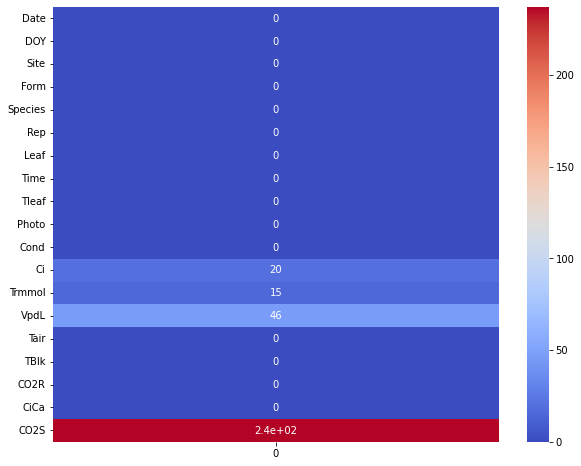

In [6]:
plt.figure(figsize = (10, 8))
sns.heatmap(pd.DataFrame(data.isnull().sum()), annot = True, cmap = "coolwarm")

There are some variables with na values that must be removed.

In [7]:
#Replacing NaN values according to species

for var in data.columns.tolist():
    Na_val = data[var].isnull().sum()
    if Na_val != 0:
        mean = data[var].mean()
        print(mean)
        data[var].fillna(mean, inplace = True)

231.12358806292707
2.6445583300965114
2.419945305230493
379.16911703883943


In [8]:
#Filtering  variables according to its data type.
continous_variables = ["Tleaf", "Cond","Ci", "Trmmol","VpdL","Tair","TBlk","CO2R","CiCa","CO2S"]

The total of numeric, continuous variables associated with the direct experimental measures were selected into a group of candidates of predicting features.

In [9]:
# The exploration_plotting function is created to visualize the general distribution of the predicting variables
def exploration_plotting(data, var):
    stat, p = shapiro(data[var])
    nstat, n_p = normaltest(data[var])
    print(f"{var} //Shapiro p-value = {p},\nSkewness = {data[var].skew():.3f}, Kurtosis = {data[var].kurtosis():.3f}")
    #Creating subplot element
    fig, axes = plt.subplots(1,2)
    #Setting axes
    sns.boxplot(y = var, data = data, ax = axes[1])
    axes[1].set_title(var)
    sns.kdeplot(data[var],ax = axes[0])
    axes[0].set_title(var)
    plt.show()

Tleaf //Shapiro p-value = 1.9575986583315769e-19,
Skewness = 0.062, Kurtosis = -0.798


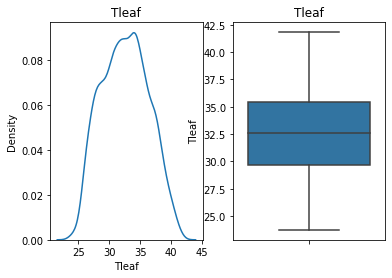

Cond //Shapiro p-value = 0.0,
Skewness = 3.297, Kurtosis = 22.998


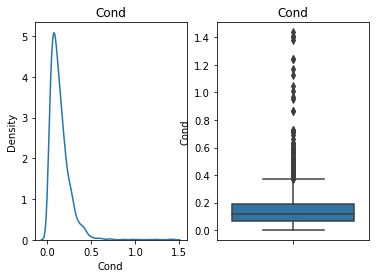

Ci //Shapiro p-value = 2.3401684354224445e-43,
Skewness = 1.736, Kurtosis = 30.239


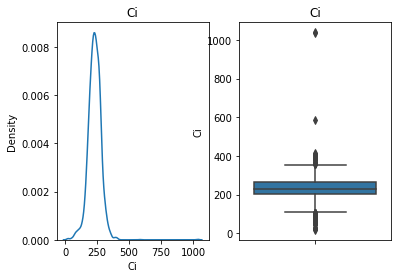

Trmmol //Shapiro p-value = 3.375673742281946e-36,
Skewness = 1.034, Kurtosis = 1.653


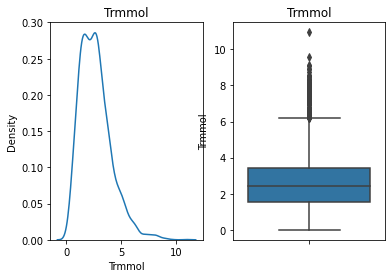

VpdL //Shapiro p-value = 1.0406595651848047e-32,
Skewness = 0.768, Kurtosis = 0.335


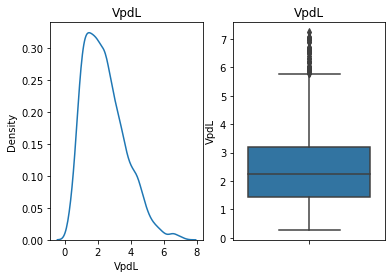

Tair //Shapiro p-value = 1.4009497172803469e-24,
Skewness = 0.120, Kurtosis = -0.869


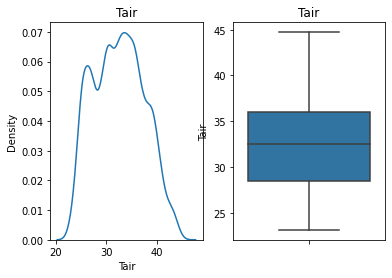

TBlk //Shapiro p-value = 2.756629366534127e-27,
Skewness = 0.154, Kurtosis = -0.869


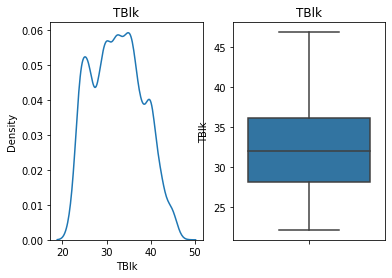

CO2R //Shapiro p-value = 0.0,
Skewness = 1.905, Kurtosis = 12.285


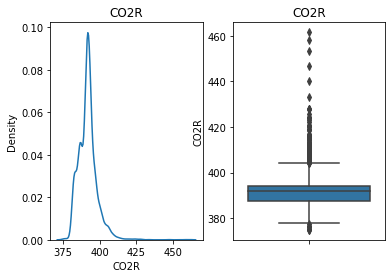

CiCa //Shapiro p-value = 7.006492321624085e-45,
Skewness = 1.007, Kurtosis = 24.377


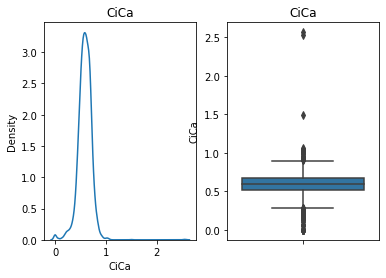

CO2S //Shapiro p-value = 5.047651735651278e-31,
Skewness = 0.398, Kurtosis = 4.312


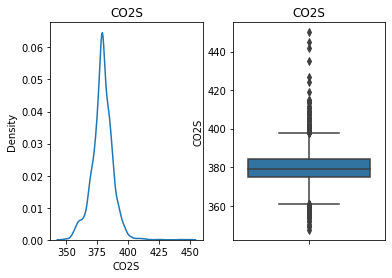

In [10]:
for var in continous_variables:
    exploration_plotting(data, var)

In general terms the predicting features don't follow a normal distribution and some of them show several outliers.

In [11]:
# Regplot function plots the regression tendency line for every independent variable in relation to the dependent variable.
def regplot(data, variables, target_var):
    sub_y = 1 if len(variables) > 8 else 2
    sub_x = len(variables) if  len(variables) <= 8 else round(len(variables) / 2)
    
#     #fig, axes = plt.subplots(sub_y, sub_x)
#     ax_x = 0
#     ax_y = 0
    for var in variables:
#         print(ax_y, ax_x)
        sns.regplot(x = data[var], y = data[target_var])#, ax = axes[ax_y, ax_x])
        plt.show()
#         ax_x += 1
#         if ax_x == 8:
#             ax_y += 1
#             sx_x = 0

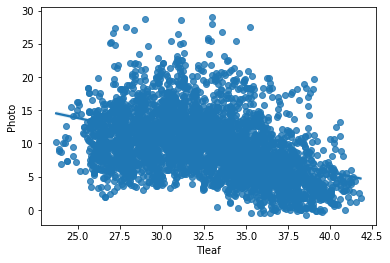

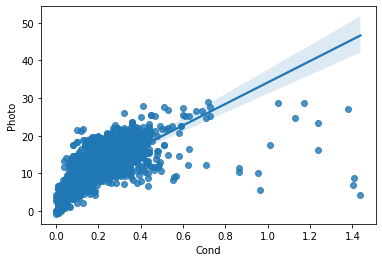

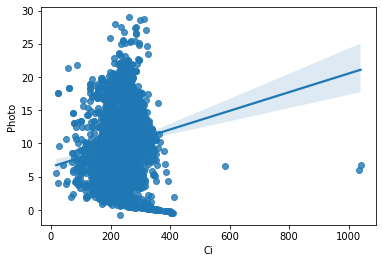

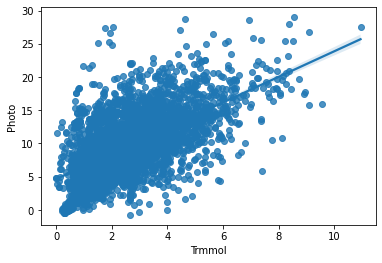

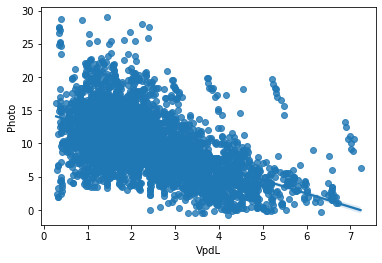

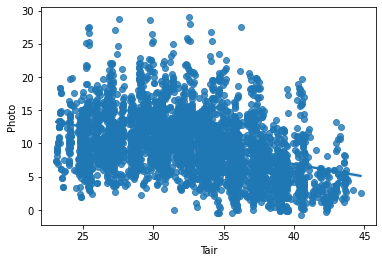

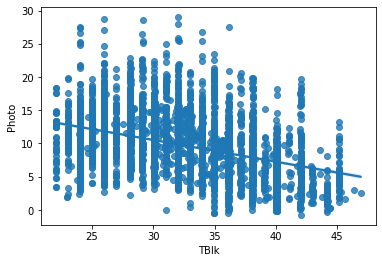

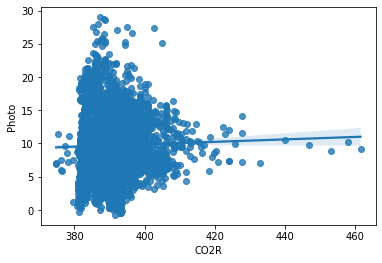

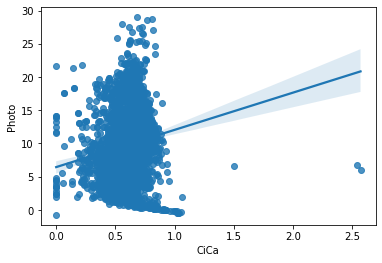

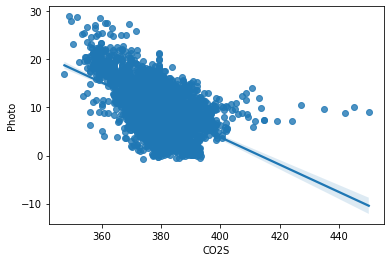

In [12]:
regplot(data, continous_variables, "Photo")

## Linear regression 

In [13]:
#Setting X and y variables
y = data["Photo"]
X = data[continous_variables]

<AxesSubplot:>

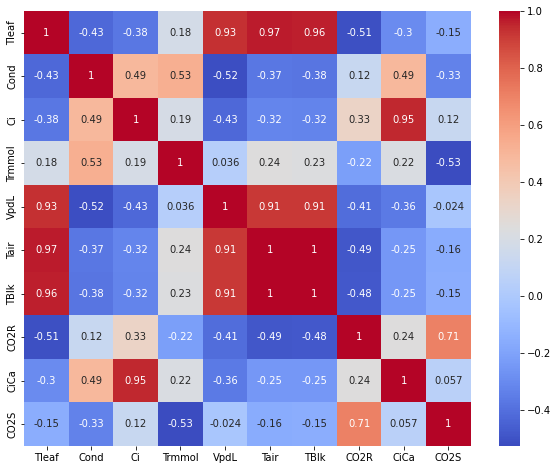

In [14]:
# Plotting correlation frame 
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,8)
sns.heatmap(X.corr(), annot = True, cmap = "coolwarm")

In [15]:
#Select and drop variables that have a high correlation value.
corr_vars = set()
for col in range(len(X.corr().columns)):
    for row in range(col):
        var = X.corr().iloc[col, row]
        if  var >= 0.7:
            corr_vars.add(X.corr().index[col])
print(corr_vars)
X = X.drop(corr_vars, axis = 1)
X.columns

{'TBlk', 'CO2S', 'Tair', 'CiCa', 'VpdL'}


Index(['Tleaf', 'Cond', 'Ci', 'Trmmol', 'CO2R'], dtype='object')

In [16]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape, X_test.shape, y_test.shape, y_train.shape)

(2759, 5) (1183, 5) (1183,) (2759,)


In [17]:
# data scaling using minmaxscaler from sklearn
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#Performing multiple linear regression with LineaRegression module from sklearn
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

print(f"MAE = {mean_absolute_error(y_test, y_pred)}, MSE = {mean_squared_error(y_test, y_pred)}, r^2 = {r2_score(y_test, y_pred)}")

MAE = 1.477569278102737, MSE = 4.847431427265283, r^2 = 0.7747206406607275


Linear regression  shows a promissing performance, with an r^2 score of 0.77. Mean squared and mean absolute scores also show  good values.

In [19]:
#Creating a dataframe with info about the linear coefficent of each veariable. 
important_features = pd.DataFrame(
    {
        "Features" : X_train.columns,
        "Coeff" : lr.coef_,
        "ABS(Coeff)" : abs(lr.coef_)
    }).set_index("Features").sort_values("Coeff", ascending = False)

Tecnically the regression coefficient represents how important is a variable for the regression model. "Cond" (Conductance) has the highest coefficient, which means that it is most correlated with the photosyntetic rate (or target variable) than the other variables.

In [20]:
important_features

,Coeff,ABS(Coeff)
Features,,
Cond,20.206176,20.206176
Trmmol,18.937490,18.937490
CO2R,-4.739727,4.739727
Tleaf,-11.391668,11.391668
Ci,-25.567887,25.567887


## Polynomial regression

In [21]:
#Polynomial regression is applied ussing the PolynomialFeatures module from sklearn

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

After transforming the datast into a polynomial model a regularization procedure is needed to set as many coefficients to 0

In [22]:
from sklearn.linear_model import LassoCV
alphas = np.logspace(-6, 6 , 50)

lasso_reg = LassoCV(alphas = alphas, fit_intercept= False, cv = 5)
lasso_reg.fit(X_train_poly, y_train)

y_train_pred = lasso_reg.predict(X_train_poly)
y_test_pred = lasso_reg.predict(X_test_poly)

C:\Users\Andres\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143.0374284727077, tolerance: 25.16398588389644
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Andres\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 674.9597405791046, tolerance: 25.16398588389644
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Andres\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 865.4104660368928, tolerance: 25.16398588389644
  model = cd_fast.enet_coordinate_descent_gram(
C:\U

C:\Users\Andres\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 463.27803148141373, tolerance: 25.63278262559828
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Andres\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 478.5707787674189, tolerance: 25.63278262559828
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Andres\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 482.3896774939201, tolerance: 25.63278262559828
  model = cd_fast.enet_coordinate_descent_gram(
C:\

C:\Users\Andres\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 410.12378443132224, tolerance: 25.58181195923912
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Andres\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 405.70476729328254, tolerance: 25.58181195923912
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Andres\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 401.70791772221435, tolerance: 25.58181195923912
  model = cd_fast.enet_coordinate_descent_gram(
C

In [23]:
# Best alpha
lasso_reg.alpha_ 

9.540954763499944e-06

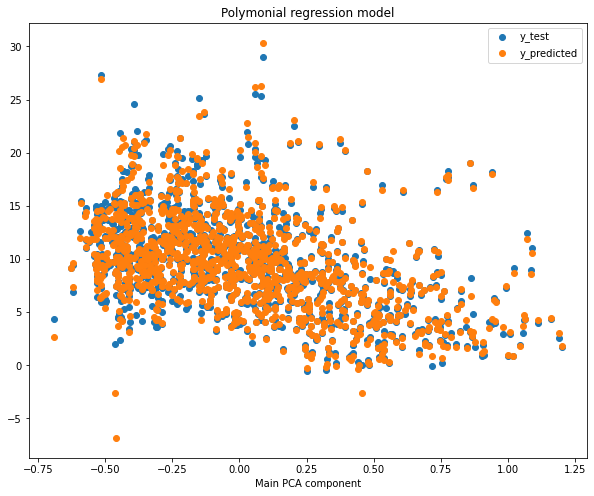

In [50]:
#Plotting polynomial model

from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
pca.fit(X_train_poly, y_train)
X_reduced = pca.transform(X_test_poly)

plt.rcParams['figure.figsize'] = (10,8)

plt.scatter(X_reduced,y_test, label = 'y_test')
plt.scatter(X_reduced,y_test_pred, label = 'y_predicted')
plt.title('Polymonial regression model')
plt.xlabel('Main PCA component')
plt.legend()



In [24]:
print(f'r2_score = {r2_score(y_test, y_test_pred)}, MAE = {mean_absolute_error(y_test, y_test_pred)}, MSE = {mean_squared_error(y_test, y_test_pred)}')
r2 = r2_score(y_test, y_test_pred)

r2

r2_score = 0.9748550008619017, MAE = 0.327461736782839, MSE = 0.5410556005577555


0.9748550008619017

The best alpha value selected for the lasso model results in r^2 score of 0.97, which is way best than the r^2 score obtained with the linear model, and it's even very close to 1. Next step is to search for any polynomial relation between the most important feature of the investigation, which is Tleaf, and the Photosyntesis rate. The models will be created with the numpy function polyfit, using the powers from 2 to 6.

### Polynomial regression for leaf temperature

In [25]:
#Using numpy to create polynomial models for the Tleaf variable, aiming to explore any relation between it 

X_tr_t = pd.DataFrame(X_train_scaled, columns = X_train.columns.tolist())["Tleaf"]
X_ts_t = pd.DataFrame(X_test_scaled, columns = X_test.columns.tolist())["Tleaf"]

#Create a dataframe with predictions of multiple power regressions
pred_frame = pd.DataFrame({"X_test": X_ts_t})
pred_frame["y_test"] = y_test.values
#Loop over multiple powers
powers = [n for n in range(2,7)]
names = [f"pred_exp_{p}" for p in powers]
for name in names:
    pred_frame[name] = 0
for power,name in zip(powers, names):
    polyf = np.polyfit(x= X_tr_t, y = y_train, deg = power)
    ec = np.poly1d(polyf)
    pred_frame[name] = pred_frame.apply(lambda x : ec(x['X_test']), axis = 1)

pred_frame

,X_test,y_test,pred_exp_2,pred_exp_3,pred_exp_4,pred_exp_5,pred_exp_6
0,0.451544,9.460,11.135440,11.321817,11.622829,11.700400,11.791329
1,0.829927,6.639,4.967896,5.032266,4.581899,4.793902,4.932085
2,0.296463,16.060,11.630641,12.005075,11.680802,11.730623,11.586705
3,0.324537,10.240,11.628599,12.024628,11.816985,11.909289,11.783528
4,0.376193,8.120,11.523652,11.884543,11.914321,12.041306,11.998816
...,...,...,...,...,...,...,...
1178,0.682033,7.639,8.216037,7.822002,7.635587,7.546010,7.414034
1179,0.796968,1.288,5.784831,5.646079,5.114849,5.270158,5.284455
1180,0.236946,6.500,11.506890,11.715955,11.258612,11.186575,11.103332
1181,0.463223,12.790,11.050298,11.201354,11.527676,11.589693,11.693710


In [26]:
#Create a dataframe to put the resulting metrics for every model obtained.
metrics_df = pd.DataFrame({"exp" : pred_frame.columns.tolist()[2:],
                          "MSE" : [mean_squared_error(pred_frame["y_test"], pred_frame[var]) for var in pred_frame.columns.tolist()[2:]],
                          "MAE" : [mean_absolute_error(pred_frame["y_test"], pred_frame[var]) for var in pred_frame.columns.tolist()[2:]], 
                          "R2" : [r2_score(pred_frame["y_test"], pred_frame[var]) for var in pred_frame.columns.tolist()[2:]]}).set_index("exp")
metrics_df

,MSE,MAE,R2
exp,,,
pred_exp_2,16.007592,3.073889,0.256064
pred_exp_3,15.804835,3.053935,0.265487
pred_exp_4,15.709480,3.036918,0.269918
pred_exp_5,15.671665,3.033871,0.271676
pred_exp_6,15.638717,3.031936,0.273207


The scores obtained for the  polynomial models of  leaf temperature and  photosyntetic rate show very poor results. None of these models (plotted below) can explain what kind of relation exist between both variables.

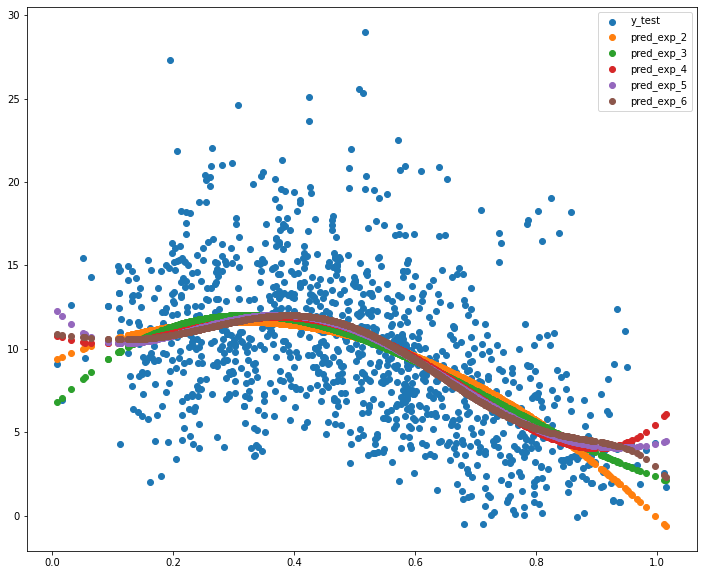

In [27]:
#Plot the models
plt.rcParams["figure.figsize"] = (12, 10)

for var in pred_frame.columns.tolist()[1:]:
    plt.scatter(pred_frame["X_test"], pred_frame[var], label = var)
    plt.legend()

##  Neighbors Regression

### Regression for Leaf Tempreature  

In [58]:
#First approach with a single variable (Tleaf) and a number of k neighbors of three

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

n_reg = KNeighborsRegressor(n_neighbors= 3, metric = 'euclidean')
n_reg.fit(X_train['Tleaf'].values.reshape(-1, 1), y_train)
y_pred_n = n_reg.predict(X_test['Tleaf'].values.reshape(-1, 1))

print(f"MAE = {mean_absolute_error(y_test, y_pred_n)}, MSE = {mean_squared_error(y_test, y_pred_n)}, r2 = {r2_score(y_test, y_pred_n)}")

MAE = 3.558228855149619, MSE = 21.195710453594067, r2 = 0.01495129051877686


#### Tuning parameters: 

In [59]:
from sklearn.model_selection import GridSearchCV

parameters = {'metric' : ('manhattan', 'euclidean', 'cosine'),
              'n_neighbors' : range(1, 21),
             }
knr = KNeighborsRegressor()
gscv = GridSearchCV(knr, param_grid = parameters, scoring = 'r2')
gscv.fit(X_train['Tleaf'].values.reshape(-1, 1), y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'metric': ('manhattan', 'euclidean', 'cosine'),
                         'n_neighbors': range(1, 21)},
             scoring='r2')

In [60]:
y_gscv_pred = gscv.predict(X_test['Tleaf'].values.reshape(-1, 1))
print(f"MAE = {mean_absolute_error(y_test, y_gscv_pred)}, MSE = {mean_squared_error(y_test, y_gscv_pred)}, r2 = {r2_score(y_test, y_gscv_pred)}")

MAE = 3.1159421590363032, MSE = 16.6993869317734, r2 = 0.22391327328772392


In [61]:
gscv.best_params_

{'metric': 'manhattan', 'n_neighbors': 19}

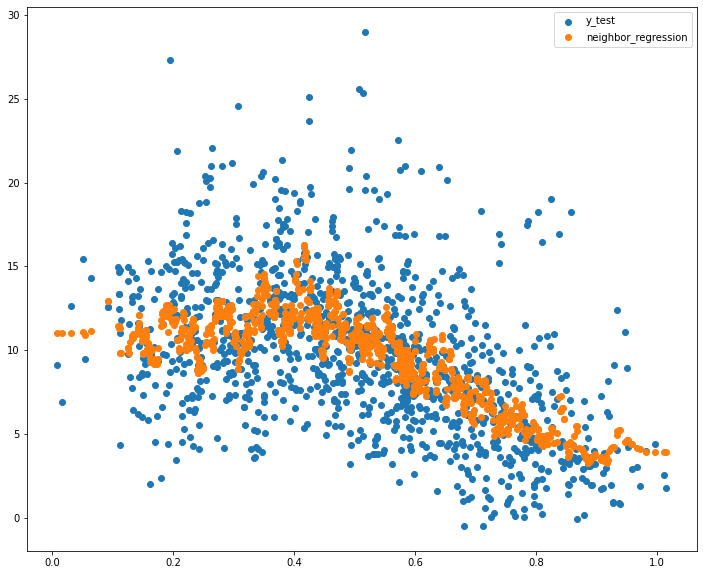

In [62]:
plt.rcParams["figure.figsize"] = (12, 10)
plt.scatter(X_ts_t, y_test, label = "y_test")
plt.scatter(X_ts_t, y_gscv_pred, label = "neighbor_regression")
plt.legend()

The result of the neighbors regression for the Tleaf variable shows a r^2 score of 0.22, which is pretty bad compared with the score obtained from the polymonial regression. For all the predicting variables the regression is performed next.

### Neighbors regression for all predicting variables 

In [51]:
gscv = GridSearchCV(knr, param_grid = parameters, scoring = 'r2')
gscv.fit(X_train, y_train)
y_k_pred = gscv.predict(X_test)

gscv.best_params_

{'metric': 'manhattan', 'n_neighbors': 4}

In [52]:
print(f"MAE = {mean_absolute_error(y_test, y_k_pred)}, MSE = {mean_squared_error(y_test, y_k_pred)}, r2 = {r2_score(y_test, y_k_pred)}")

MAE = 2.005979092591716, MSE = 7.458045049968107, r2 = 0.65339507407367


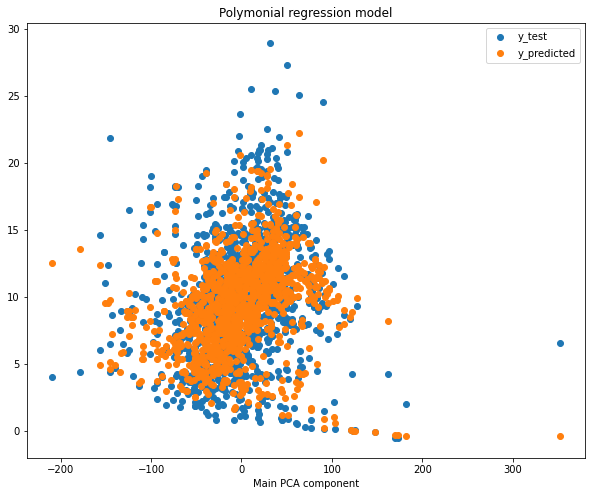

In [53]:
#Plotting model

pca = PCA(n_components = 1)
pca.fit(X_train, y_train)
X_reduced = pca.transform(X_test)

plt.rcParams['figure.figsize'] = (10,8)

plt.scatter(X_reduced,y_test, label = 'y_test')
plt.scatter(X_reduced,y_k_pred, label = 'y_predicted')
plt.title('Polymonial regression model')
plt.xlabel('Main PCA component')
plt.legend()

The r^2 score for all the predicting variables shows a better result, yet it is not better than the obtained from polynomial regression.

## Decision trees regression 

In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

depths = [1,2,3,4]
r2_scores = []
for depth in depths:
    dtr = DecisionTreeRegressor(max_depth = depth)
    dtr.fit(X_train, y_train)
    y_tr_pred = dtr.predict(X_test)
    r2 = r2_score(y_test, y_tr_pred)
    r2_scores.append(r2)
    print(f"depth = {depth}, MAE = {mean_absolute_error(y_test, y_tr_pred)}, MSE = {mean_squared_error(y_test, y_tr_pred)}, r2 = {r2_score(y_test, y_tr_pred)}")

depth = 1, MAE = 2.5438509624710632, MSE = 10.438809046196463, r2 = 0.5148671519178475
depth = 2, MAE = 1.9348183134647963, MSE = 6.783456113856956, r2 = 0.684745896797988
depth = 3, MAE = 1.6636341730190474, MSE = 4.837337195692371, r2 = 0.7751897596273162
depth = 4, MAE = 1.4022105785471277, MSE = 3.4724566859563253, r2 = 0.8386211689049226


Text(0, 0.5, 'r^2 score')

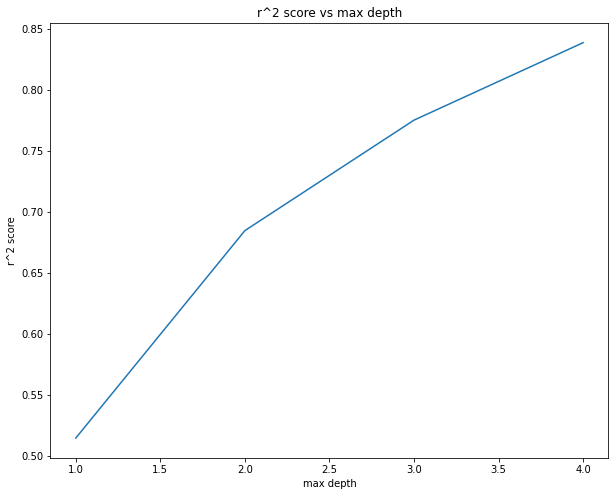

In [64]:
plt.figure(figsize = (10,8)) 

plt.plot(depths,  r2_scores)
plt.title('r^2 score vs max depth')
plt.xlabel('max depth')
plt.ylabel('r^2 score')

Finally, using decision tree regression model for the whole dataset good results are obtained specially for max depths values of 3 and 4. Yet the best R^2 score obtained for max depth = 4 is not as good as the score obtained for the polynomial regression.